In [14]:
# Based on Zhang/Oxford paper and github/shilewenuw implementation

In [15]:
from Model import Model
import pandas as pd

In [16]:
#dfr = pd.read_csv("new_returns.csv") # returns
dff = pd.read_csv("new_features.csv") # features

In [17]:
dff.shape

(9566, 312)

In [18]:
close_cols = [colname for colname in dff.columns if colname.split()[1] == "close"]
close_cols

['AdM close',
 'AL close',
 'A close',
 'GO close',
 'JS close',
 'KvW close',
 'KA close',
 'SA close',
 'S close',
 'Ve close',
 'Vi close',
 'Z close']

In [19]:
df_close = dff[close_cols].copy()
df_close.rename(columns={colname: colname.split()[0] for colname in df_close.columns}, inplace=True)
df_close.head()

,AdM,AL,A,GO,JS,KvW,KA,SA,S,Ve,Vi,Z
0,229.912597,1048.195089,5258.509097,785.749481,69.970392,21.790732,3065.433564,6791.196084,30.613892,61.681587,3877.559631,521.150292
1,222.457725,1026.394270,5125.827632,767.167567,68.744350,20.976506,3004.030094,6612.089249,29.557249,60.201578,3843.123472,499.684147
2,215.705123,1025.809013,5080.297423,758.672978,69.116046,21.017217,2963.956251,6939.832461,30.060412,60.136283,3805.161980,499.684147
3,219.054413,1035.758381,5120.078868,763.318457,69.215905,21.159707,2969.127069,6837.273361,30.146668,60.223342,3811.257294,492.358399
4,213.922436,1022.882729,5066.500391,753.363860,68.486382,20.966328,2947.366541,6743.632443,30.132292,59.374513,3777.989667,478.388368


In [20]:
import numpy as np

For Loop

In [21]:
iters = 100

In [22]:
old_coeffs = np.ones(12) / 12.0

In [23]:
old_coeffs

array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333])

In [24]:
profits = []

In [25]:
for i in range(iters):
    print(f"Iteration: {i+1}")
    model = Model()
    next_index = i-iters
    coeffs = model.get_allocations(df_close[i:next_index])
    hourly_profit = np.sum(( np.multiply(df_close.iloc[next_index-1].to_numpy()[0], old_coeffs) - np.multiply(df_close.iloc[next_index].to_numpy()[0], coeffs)))
    print(f"Profit = {hourly_profit}")
    profits.append(hourly_profit)
    print(f"Cumulative Profit = {sum(profits)}")
    old_coeffs = coeffs
    print("---------------")

Iteration: 1
1/1 [==============================] - 0s 428ms/step
Profit = -13.505220566271305
Cumulative Profit = -13.505220566271305
---------------
Iteration: 2
1/1 [==============================] - 0s 421ms/step
Profit = 13.829353332519531
Cumulative Profit = 0.3241327662482263
---------------
Iteration: 3
1/1 [==============================] - 0s 419ms/step
Profit = -2.21490478515625
Cumulative Profit = -1.8907720189080237
---------------
Iteration: 4
1/1 [==============================] - 0s 412ms/step
Profit = -5.07794189453125
Cumulative Profit = -6.968713913439274
---------------
Iteration: 5
1/1 [==============================] - 0s 427ms/step
Profit = -4.969795227050781
Cumulative Profit = -11.938509140490055
---------------
Iteration: 6
1/1 [==============================] - 0s 414ms/step
Profit = 13.721271514892578
Cumulative Profit = 1.7827623744025232
---------------
Iteration: 7
1/1 [==============================] - 0s 412ms/step
Profit = 7.454875946044922
Cumulative 

KeyboardInterrupt: ignored

In [26]:
profits

[-13.505220566271305,
 13.829353,
 -2.2149048,
 -5.077942,
 -4.969795,
 13.7212715,
 7.454876,
 14.099289,
 5.56427,
 -2.8089752,
 6.698511,
 -7.671076,
 20.312012,
 -0.43244934,
 -9.021347,
 1.7286911,
 10.588135,
 -1.0803852,
 6.9685135,
 6.2124405,
 -36.19387,
 12.262581,
 10.048157,
 13.937088,
 12.532829,
 -3.1330776,
 -16.476337,
 4.429741,
 7.5629425,
 21.608276,
 -14.099445,
 -16.260239,
 1.4586334,
 -3.0251465,
 -5.5643234,
 -4.429638,
 1.7287216,
 -8.157036,
 -2.70121,
 -8.643291,
 -10.480011,
 14.855516,
 4.2678394,
 -9.129555,
 9.399597,
 -25.65987,
 19.339539,
 -8.049076,
 6.4285088,
 8.967369]

In [27]:
sum(profits)

37.220479812146664

In [28]:
import matplotlib.pyplot as plt

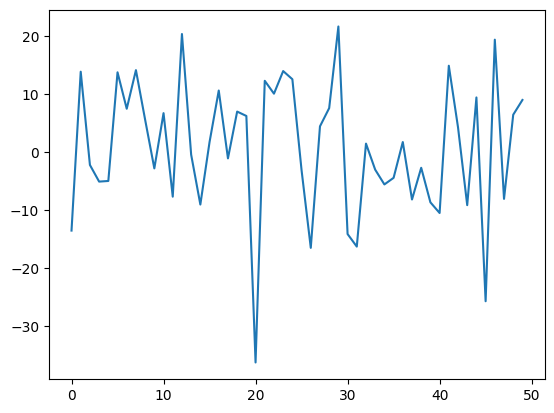

In [29]:
plt.plot(profits)

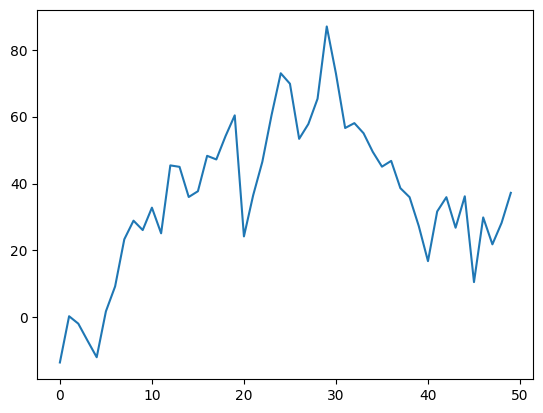

In [30]:
plt.plot(np.cumsum(profits))